In [1]:
# Pftk Imports
import pftk.pftkutil.qsdateutil as du
import pftk.pftkutil.tsutil as tsu
import pftk.pftkutil.data_access as da

# Third Party Imports
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd

# List of symbols
#ls_symbols = ["AGP", "CORP", "IJR"]
ls_symbols = ["AAPL", "GLD", "IJR", "SPY", "XOM"]


# Start and End date of the charts
dt_start = dt.datetime(2008, 1, 1)
dt_end = dt.datetime(2017, 12, 31)

# We need closing prices so the timestamp should be hours=16.
dt_timeofday = dt.timedelta(hours=16)

# Get a list of trading days between the start and the end.
ldt_timestamps = du.getNYSEdays(dt_start, dt_end, dt_timeofday)

# Creating an object of the dataaccess class
c_dataobj = da.DataAccess('EODHistoricalData')

# Keys to be read from the data, it is good to read everything in one go.
ls_keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']

# Reading the data, now d_data is a dictionary with the keys above.
# Timestamps and symbols are the ones that were specified before.
ldf_data = c_dataobj.get_data(ldt_timestamps, ls_symbols, ls_keys, verbose=False)
d_data = dict(zip(ls_keys, ldf_data))

# Filling the data for NAN
for s_key in ls_keys:
    d_data[s_key] = d_data[s_key].fillna(method='ffill')
    d_data[s_key] = d_data[s_key].fillna(method='bfill')
    d_data[s_key] = d_data[s_key].fillna(1.0)

# Getting the numpy ndarray of close prices.
na_price = d_data['close'].values

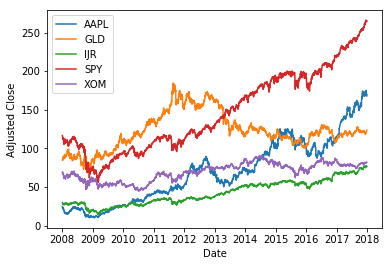

In [2]:
# Plotting the prices with x-axis=timestamps
plt.clf()
plt.plot(ldt_timestamps, na_price)
plt.legend(ls_symbols)
plt.ylabel('Adjusted Close')
plt.xlabel('Date')
plt.savefig('adjustedclose.pdf', format='pdf')

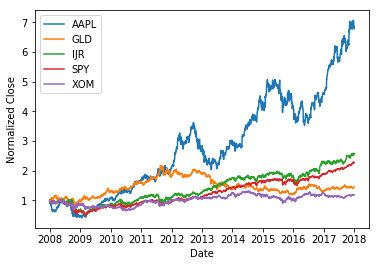

In [3]:
# Normalizing the prices to start at 1 and see relative returns
na_normalized_price = na_price / na_price[0, :]

# Plotting the prices with x-axis=timestamps
plt.clf()
plt.plot(ldt_timestamps, na_normalized_price)
plt.legend(ls_symbols)
plt.ylabel('Normalized Close')
plt.xlabel('Date')
plt.savefig('normalized.pdf', format='pdf')

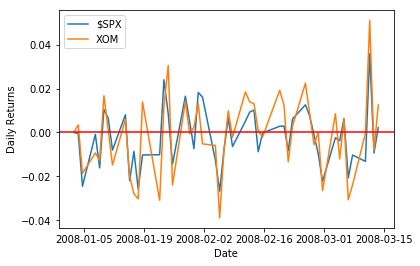

In [4]:
# Copy the normalized prices to a new ndarry to find returns.
na_rets = na_normalized_price.copy()

# Calculate the daily returns of the prices. (Inplace calculation)
# returnize0 works on ndarray and not dataframes.
tsu.returnize0(na_rets)

# Plotting the plot of daily returns
plt.clf()
plt.plot(ldt_timestamps[0:50], na_rets[0:50, 3])  # $SPX 50 days
plt.plot(ldt_timestamps[0:50], na_rets[0:50, 4])  # XOM 50 days
plt.axhline(y=0, color='r')
plt.legend(['$SPX', 'XOM'])
plt.ylabel('Daily Returns')
plt.xlabel('Date')
plt.savefig('rets.pdf', format='pdf')

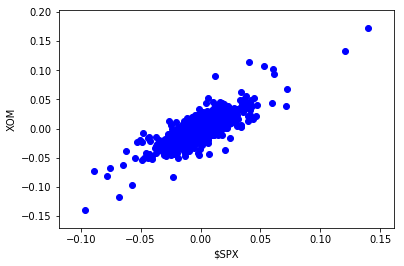

In [5]:
# Plotting the scatter plot of daily returns between XOM VS $SPX
plt.clf()
plt.scatter(na_rets[:, 3], na_rets[:, 4], c='blue')
plt.ylabel('XOM')
plt.xlabel('$SPX')
plt.savefig('scatterSPXvXOM.pdf', format='pdf')

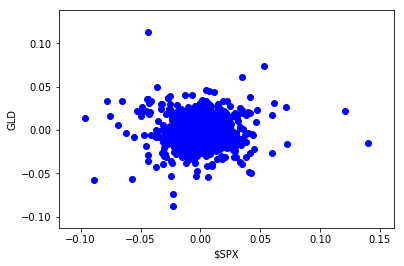

In [6]:
# Plotting the scatter plot of daily returns between $SPX VS GLD
plt.clf()
plt.scatter(na_rets[:, 3], na_rets[:, 1], c='blue')  # $SPX v GLD
plt.ylabel('GLD')
plt.xlabel('$SPX')
plt.savefig('scatterSPXvGLD.pdf', format='pdf')